# Data Cleaning (Kaggle Dataset)

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
# from sklearn.model_selection import train_test_split
import string 
import re
from itertools import groupby
import os

### Sammy's Cleaning (one song)

In [3]:
# df = pd.read_csv('./data/raw/chords_and_lyrics.csv')

# # Get chords of a song
# song = df.loc[124592, 'chords'] # this is a string
# # Convert string to list of strings
# song_list = song.split()

# # Create a list from A to G
# letters = list(string.ascii_uppercase)[:7]
# # >>> ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# # Get a list of all the chords in the song
# chords = [chord for chord in song_list if chord[0] in letters]

# # Remove repeated chords
# chords = next(zip(*itertools.groupby(chords)))

### My preprocessing

#### Make it smaller

In [9]:
current_path = os.getcwd()
repo_path = current_path.split('/final-project-cleaning')[0]
data_path = repo_path + '/final-project-data/data/raw/kaggle_raw.csv'

In [10]:
kaggle_raw_df = pd.read_csv(data_path)
kaggle_raw_df.head(3)

,Unnamed: 0,artist_name,song_name,chords&lyrics,chords,lyrics,tabs,lang,artist_id,followers,genres,popularity,name_e_chords
0,0,Justin Bieber,"10,000 Hours",\nCapo on 3rd fret\n\t \t\t \r\n\r\nVerse 1:\...,{3: 'G G/B ...,"{0: '\nCapo on 3rd fret\n\t \t\t ', 1: '', 2:...","{89: ""I-----, I'm gonna love you ""}",en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
1,1,Justin Bieber,2 Much,\n\t \t\t\r\nIntro: F#m7 D2 \r\n\r\nVerse 1:...,"{1: 'Intro: F#m7 D2 ', 4: 'F#m7 ', 8: 'D2 ', ...","{0: '\n\t \t\t', 2: '', 3: 'Verse 1:', 5: ' ...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber
2,2,Justin Bieber,2u (feat. David Guetta),\n\t \t\t\r\nEm D C ...,{1: 'Em D C C...,"{0: '\n\t \t\t', 2: ""No limit in the sky that...",{},en,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100,justin-bieber


In [11]:
len(kaggle_raw_df)

135783

In [12]:
nonrepeated_songs_df = kaggle_raw_df.drop_duplicates(subset=['artist_name', 'song_name'], keep = 'last').reset_index(drop = True)

In [13]:
len(nonrepeated_songs_df)

135775

In [14]:
kaggle_slim_df = nonrepeated_songs_df.loc[:, ['artist_name', 'genres', 'chords', 'song_name']]
kaggle_slim_df.head(3)

,artist_name,genres,chords,song_name
0,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",{3: 'G G/B ...,"10,000 Hours"
1,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","{1: 'Intro: F#m7 D2 ', 4: 'F#m7 ', 8: 'D2 ', ...",2 Much
2,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",{1: 'Em D C C...,2u (feat. David Guetta)


In [15]:
kaggle_slim_df['chords'][0]

"{3: 'G             G/B                         C ', 5: '                  G ', 7: 'G                  G/B                         C ', 9: '                G ', 13: '         G         Em             C       G     ', 15: '     G        Em                C   G ', 19: '          G            Em        C            G    ', 21: '      G              Em                  C              G    ', 23: '      G           Em             C         G    ', 25: '        G            Em           C          G    ', 27: '           G        Em       C        G            ', 31: 'G             G/B                       C ', 33: '                 G ', 35: 'G                G/B                C        ', 37: '                G ', 41: '         G         Em             C       G     ', 43: '     G        Em                C   G ', 47: '          G            Em        C            G    ', 49: '      G              Em                  C              G    ', 51: '      G           Em             C         G 

#### Fix chords

In [16]:
def translate_remove_symbols(song):
    
    useful_symbols = {'*': 'dim', '°': 'dim', 'º': 'dim', 'o': 'dim', '+': 'aug', '#': 'sharp'}
    
    cleaned_song = song.copy()
    
    # Fix dashes and commas
    for idx, chord in enumerate(cleaned_song):
        if '--' in chord:
            cleaned_song[idx] = chord.split('--')[0]
        elif '-' in chord:
            linechords = chord.split('-')
            cleaned_song[idx] = linechords[0]
            i = idx + 1
            for lc in linechords[1:]:
                cleaned_song.insert(i, lc)
                i += 1
        elif ',' in chord:
            linechords = chord.split(',')
            cleaned_song[idx] = linechords[0]
            i = idx + 1
            for lc in linechords[1:]:
                cleaned_song.insert(i, lc)
                i += 1
        else:
            pass
    
    # Break all slash chords
    for idx, chord in enumerate(cleaned_song):
        if '/' in chord:
            cleaned_song[idx] = chord.split('/')[0]
        elif '|' in chord:
            cleaned_song[idx] = chord.split('|')[0]
        elif '\\' in chord:
            cleaned_song[idx] = chord.split('\\')[0]
        else:
            pass
    
    # Translate uselful symbols to string
    for idx, chord in enumerate(cleaned_song):
        for sym in useful_symbols:
            if sym in chord:
                cleaned_song[idx] = chord.replace(sym, useful_symbols[sym])
            else:
                pass
    
    for idx, chord in enumerate(cleaned_song):
        cleaned_song[idx] = re.sub(r'[^\w\s]', '', chord)
    
    for idx, chord in enumerate(cleaned_song):
        if 'sharp' in cleaned_song[idx]:
            cleaned_song[idx] = chord.replace('sharp', '#')
    
    return cleaned_song

In [17]:
def merge_chords(song):
        
    chords_format = {'': ['add', 'major', 'maj', 'M', 'Major', 'Maj', '2', '4', '6'], 
                     'm': ['minor', 'min'],
                     '7': ['sus', '9', '11', '13'],
                     'aug': ['augmented'],
                     'dim': ['diminished'],
                     'hdim7': ['h7', 'hdim', 'hdim7', 'h']
                     }
    
    second_letters = ['b', '#', 'm', 'd', 'a', '7', 'h']
    
    formatted_song = song.copy()
    
    # substitute correct formats
    for key, value in chords_format.items():
        for i in value:
            for idx, chord in enumerate(formatted_song):
                if i in chord:
                    if key == '7':
                        if chord.count(key) > 0:
                            formatted_song[idx] = chord.split(i)[0]
                            pass
                        else:
                            formatted_song[idx] = chord.split(i)[0] + key
                    else:
                        formatted_song[idx] = chord.split(i)[0] + key
                else:
                    pass 
    
    # delete words (based on second letter)
    for idx, chord in enumerate(formatted_song):
        if len(chord) > 1:
            if chord[1] not in second_letters:
                del formatted_song[idx]
            else:
                pass
                    
                
    return formatted_song

In [18]:
# test_list = ['G7sus11', 'B+7', 'G/B', 'D#addb9', 'Chords', 'A']

# for idx, chord in enumerate(test_list):
#     print(chord)
#     if 'chor' in chord.lower():
#         del test_list[idx]

# trans = translate_remove_symbols(test_list)
# merge_chords(trans)

In [19]:
def clean_chords(chords_column):
    
    letters = list(string.ascii_uppercase)[:7]
    cleaned = []
    
    column = chords_column.copy()
    
    for row in column:
        # Convert string to list of strings
        song_list = row.split()

        # Only chords that begin with designated letters
        raw_chords = [chord for chord in song_list if chord[0] in letters]

        # Delete 'chords' and 'chorus'
        for idx, chord in enumerate(raw_chords):
            if 'chor' in chord.lower():
                del raw_chords[idx]
        
        # remove symbols
        unsymboled_chords = translate_remove_symbols(raw_chords)

        # merge chords into same format
        merged_chords = merge_chords(unsymboled_chords)

        # Remove repeated chords
        non_repeating_chords = [c[0] for c in groupby(merged_chords)]

        # Delete empty strings and numbers
        clean_song = [chord for chord in non_repeating_chords if len(chord) > 0]
        clean_song = [chord for chord in clean_song if chord[0] in letters]
                
        cleaned.append(clean_song)
        
    return cleaned

In [20]:
splits = clean_chords(kaggle_slim_df['chords'])

In [21]:
kaggle_cleaned_df = kaggle_slim_df
kaggle_cleaned_df['chords'] = splits
kaggle_cleaned_df.head(3)

,artist_name,genres,chords,song_name
0,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ...","10,000 Hours"
1,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[F#m7, D, E, F#m7, A, E, D, E, Bm, A, D, E, F#...",2 Much
2,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']","[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,...",2u (feat. David Guetta)


In [22]:
len(kaggle_cleaned_df)

135775

In [23]:
dumb_df = kaggle_cleaned_df

dumb_df['chords_list'] = [''.join(map(str, l)) for l in dumb_df['chords']]
dumb_df.chords_list[0]

'GCGCGEmCGEmCGEmCGEmCGEmCGEmCGEmCGCGCGEmCGEmCGEmCGEmCGEmCGEmCGEmCGEmCGCGEmCGEmCGEmCGEmCGEmCGEmCGEmGEmCG'

In [24]:
dumb_df['song_name'] = [name.upper() for name in dumb_df['song_name']]
dumb_df.song_name[0]

'10,000 HOURS'

In [25]:
kaggle_clean_nonrep_df = dumb_df.drop_duplicates(subset=['chords_list', 'song_name'], keep = 'last').reset_index(drop = True)

In [26]:
len(kaggle_clean_nonrep_df)

131534

In [27]:
kaggle_clean_nonrep_df.drop(columns=['song_name', 'chords_list'], inplace=True)

In [28]:
def genre_cleaning(genres_column):
    
    popular_genres = ['pop', 'rock', 'jazz', 'folk', 'blues', 'country', 'world', 
                    'sertanejo', 'adoracao', 'rock-and-roll', 'bossa nova', 'reggae',
                    'lounge', 'metal', 'pagode', 'latin worship', 'mpb']

    cleaned_genres = genres_column.copy()
    
    for idx, element in enumerate(cleaned_genres):
        for genre in popular_genres:
            if genre in element:
                cleaned_genres[idx] = genre
            else:
                pass
            
    for idx, element in enumerate(cleaned_genres):
        if element == '[]':
            cleaned_genres[idx] = 'unknown'
        else:
            pass

    return cleaned_genres

In [29]:
slim_genres = genre_cleaning(kaggle_clean_nonrep_df['genres'])

In [30]:
kaggle_data_clean_clean = kaggle_clean_nonrep_df
kaggle_data_clean_clean['genres'] = slim_genres
kaggle_data_clean_clean.head(10)

,artist_name,genres,chords
0,Justin Bieber,pop,"[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ..."
1,Justin Bieber,pop,"[F#m7, D, E, F#m7, A, E, D, E, Bm, A, D, E, F#..."
2,Justin Bieber,pop,"[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,..."
3,Justin Bieber,pop,"[Em, Bm, Am, C, Em, Bm, Am, C, Em, Bm, Am, C, ..."
4,Justin Bieber,pop,"[Gm, Dm, C, Gm, Dm, C, Gm, Dm, C, Gm, A#, Cdim..."
5,Justin Bieber,pop,"[F, C, G, Am, C, G, Am, C, G, Am, C, G, Am, F,..."
6,Justin Bieber,pop,"[G, C, Cm, G, Bm, C, D, Bm, C, D, G, Em, C, D,..."
7,Justin Bieber,pop,"[F, C, G, Am, C, G, Am, C, G, Am, F, C, G, Am,..."
8,Justin Bieber,pop,"[G, Em, G, Em, G, Em, G, Em]"
9,Justin Bieber,pop,"[Am, Dm, E, Am, Dm, E, Am, E, Am, Dm, E, Am, E..."


## Distributions

### Chords per song

In [31]:
def count_chords(cleaned_df):

    chords_count_dict = {}
    
    for song in kaggle_cleaned_df['chords']:
        song_dict = dict(Counter(song))
        for chord, count in song_dict.items():
            if chord in chords_count_dict:
                chords_count_dict[chord] = chords_count_dict[chord] + count
            else:
                chords_count_dict[chord] = count
                
    return chords_count_dict

In [32]:
chords_dict = count_chords(kaggle_data_clean_clean)

In [33]:
print(len(chords_dict))

1968


In [34]:
def reduce_low_count(chord_count_dict):
    slim_chord_counts_dict = {}
    for chord, count in chord_count_dict.items():
        if count < 200:
            pass
        else:
            slim_chord_counts_dict[chord] = count
    
    return slim_chord_counts_dict

In [35]:
slim_chord_count_dict = reduce_low_count(chords_dict)

In [36]:
print(len(slim_chord_count_dict))

156


<AxesSubplot: ylabel='Count'>

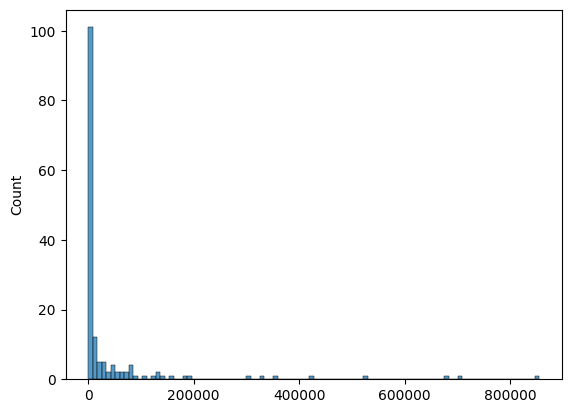

In [37]:
sns.histplot(data=slim_chord_count_dict, bins=100)

In [38]:
chord_count_df = pd.Series(slim_chord_count_dict).to_frame('chord_count')

In [39]:
chord_count_df.sort_values(by='chord_count', ascending=False, inplace=True)
chord_count_df.tail(10)

,chord_count
Gbm7,239
D#m7b5,229
Baug,224
G#7b,223
Dm7b5,217
Dbdim,215
Caug,211
E7#,210
Em5aug,206
D#m5,206


In [40]:
#chord_count_df.to_csv('./data/clean/kaggle_chord_distribution.csv')

### Distribution of Genres/Artists

#### Genres

In [41]:
def count_genres(genres_column):

    genre_count_ser = genres_column.value_counts()
    
    genre_count_df = genre_count_ser.to_frame('genre_count')
    
    genre_count_df.sort_values(by='genre_count', ascending=False, inplace=True)
    
    return genre_count_df

In [42]:
genres_df = count_genres(kaggle_data_clean_clean['genres'])

In [43]:
genres_df.head(30)

,genre_count
rock,30991
pop,24491
country,12701
mpb,12081
folk,7392
metal,5887
adoracao,4138
pagode,4076
sertanejo,3816
lounge,3344


In [44]:
# genres_fig = sns.histplot(genres_df, bins=100)
# genres_fig.set(xticklabels=[])
# plt.show()

#### Artists

In [45]:
def count_artists(artists_column):

    artist_count_ser = artists_column.value_counts()
    
    artist_count_df = artist_count_ser.to_frame('artist_count')
    
    artist_count_df.sort_values(by='artist_count', ascending=False, inplace=True)
    
    return artist_count_df

In [46]:
artists_df = count_artists(kaggle_data_clean_clean['artist_name'])

In [47]:
artists_df.head(3)

,artist_count
Johnny Cash,572
Hillsong UNITED,512
Elvis Presley,502


In [48]:
# artists_fig = sns.histplot(kaggle_cleaned_df['artist_name'], bins=100)
# artists_fig.set(xticklabels=[])
# plt.show()

## Getting Song Length

In [49]:
kaggle_data_clean_clean['song_length'] = 0
for index, row in kaggle_data_clean_clean.iterrows():
    kaggle_data_clean_clean.loc[index, 'song_length'] = len(kaggle_data_clean_clean.loc[index, 'chords'])
kaggle_data_clean_clean.head(3)

,artist_name,genres,chords,song_length
0,Justin Bieber,pop,"[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ...",79
1,Justin Bieber,pop,"[F#m7, D, E, F#m7, A, E, D, E, Bm, A, D, E, F#...",56
2,Justin Bieber,pop,"[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,...",107


In [50]:
# length_fig = sns.histplot(data=kaggle_cleaned_df, x='song_length', 
#                           kde=False, bins=1000, stat='density')
# sns.kdeplot(data=kaggle_cleaned_df, x='song_length', 
#             color='red', ax=length_fig)

## Create Testing Data

#### 5000 songs between 50 and 100 chords long

In [51]:
#kaggle_data_clean_clean['chords'] = [list(filter(None, sublist)) for sublist in kaggle_data_clean_clean['chords']]

In [52]:
kaggle_data_clean_clean.head(3)

,artist_name,genres,chords,song_length
0,Justin Bieber,pop,"[G, C, G, C, G, Em, C, G, Em, C, G, Em, C, G, ...",79
1,Justin Bieber,pop,"[F#m7, D, E, F#m7, A, E, D, E, Bm, A, D, E, F#...",56
2,Justin Bieber,pop,"[D, C, D, Em, D, C, D, Em, D, C, Am, D, Em, G,...",107


In [53]:
len(kaggle_data_clean_clean)

131534

In [54]:
filt_len = kaggle_data_clean_clean['song_length'] > 20 
kaggle_data_v1 = kaggle_data_clean_clean[filt_len]
len(kaggle_data_v1)

110099

In [55]:
# def reduce_low_count(chords_column):
#     slim_chord_counts_dict = pandas.Series()
#     for row in chords_column:
        
#         if count < 200:
#             pass
#         else:
#             slim_chord_counts_dict[chord] = count
    
#     return slim_chord_counts_dict

In [56]:
# i = 5000 / len(kaggle_data_11_30)
# kaggle_train_data_11_30, kaggle_test_data_11_30 = train_test_split(kaggle_data_11_30, train_size=i)

In [57]:
final_cc_dict = count_chords(kaggle_data_v1)
final_cc_df = pd.Series(final_cc_dict).to_frame('chord_count')
final_cc_df

,chord_count
G,855041
C,702610
Em,300321
F#m7,26295
D,680418
...,...
Em3x,1
GX,5
DV,5
CIII,10


In [58]:
#kaggle_data_v1.to_csv('~/code/emilycardwell/final-project-data/data/clean/kaggle_data_v1.csv')

In [59]:
# kaggle_train_data_11_30.to_csv('./data/clean/kaggle_train_data_11_30.csv')

#### 5000 songs from "rock" and "country"

In [1]:
genres_data_11_30 = kaggle_data_11_30[kaggle_data_11_30.genres.isin(['rock', 'country', 'pop', 'jazz', 'folk'])]
genres_data_11_30

In [ ]:
final_cc_dict = count_chords(kaggle_cleaned_df)
final_cc_df = pd.Series(final_cc_dict).to_frame('chord_count')

In [ ]:
final_cc_df.sort_values(by='chord_count', ascending=True, inplace=True)
# pd.set_option('display.max_rows', 1000) 
final_cc_df.head(10)

In [ ]:
# second_letters = [chord[1] for chord in final_cc_df.index if len(chord) > 1]
# s_l_df = pd.Series(second_letters)
# s_l_df.value_counts()

In [ ]:
i = 5000 / len(genres_data_11_30)
genres_train_data_11_30, genres_test_data_11_30 = train_test_split(genres_data_11_30, train_size=i)

In [ ]:
genres_train_data_11_30.head(3)

In [ ]:
# genres_data_11_30.to_csv('../data/clean/kaggle_genres_data_11_30.csv')
# genres_train_data_11_30.to_csv('../data/clean/kaggle_genres_train_data_11_30.csv')

In [ ]:
# for i, row in kaggle_data_11_30['genres'].items():
#     if row == '[]':
#         kaggle_data_11_30.loc[i ,'genres'] = ['unknown']
#     else:
#         pass